# Table of Contents
01. Importing libraries
02. Importing data
03. Data preprocessing
<br>I. Check data type
<br>II. Data standardization
04. Elbow technique
05. k-means algorithm
06. Attach a new column with the resulting clusters
07. Visualizations of clustered data
08. Discuss how and why the clusters make sense
09. Descriptive statistics
10. Next steps

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

# 02. Importing data

In [2]:
# Define csv path
path = r'C:\Users\lucav\Desktop\CareerFoundry\Projects\Project 5 - House Sales in King County, USA'

In [3]:
# Import data from 'kc_house_data.csv'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_final.csv'), index_col = 0)

In [4]:
# Check the number of rows and columns
df.shape

(21613, 21)

In [5]:
# Display the top 5 rows
pd.set_option('display.max_columns', None)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Size category
0,2014-10,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Medium
1,2014-12,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Large
2,2015-02,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Small
3,2014-12,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Medium
4,2015-02,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Medium


In [6]:
# Display columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Size category'],
      dtype='object')

# 03. Data preprocessing

## I. Check data type

In [7]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The columns 'date' and 'Size category' contain objects and they can't be fed into the k-means algorithm.

In [8]:
# Convert the 'date' variable from object to number
df["date"] = pd.to_datetime(df["date"])

# Create the 'year' and 'month' columns to store the new numeric variables
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date. month)

# Drop the 'date' column
df.drop("date", axis=1, inplace=True)

In [9]:
# Drop the 'Size category' column
df.drop("Size category", axis=1, inplace=True)

In [10]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

The dataframe contains now only numeric variables.

## II. Data standardization

In [11]:
# Descriptive statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


It can be observed that the difference between variables’ scales is very large, thus they need to be standardized.

In [12]:
# Standardize data using 'StandardScaler' function
standardized_data = StandardScaler().fit_transform(df)
print(standardized_data)

[[-0.86671733 -0.39873715 -1.44746357 ... -0.26071541 -0.69065478
   1.09962055]
 [-0.00568792 -0.39873715  0.1756067  ... -0.18786773 -0.69065478
   1.74162654]
 [-0.98084935 -1.47395936 -1.44746357 ... -0.17237524  1.44790136
  -1.46840343]
 ...
 [-0.37586519 -1.47395936 -1.77207762 ... -0.39414129 -0.69065478
  -0.18439144]
 [-0.38158814 -0.39873715  0.50022075 ... -0.42051149  1.44790136
  -1.78940643]
 [-0.58588173 -1.47395936 -1.77207762 ... -0.41794772 -0.69065478
   1.09962055]]


In [13]:
# Convert 'standardized_data' from nparray to dataframe
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)

In [14]:
# Display the top 5 rows
pd.set_option('display.max_columns', None)
df_standardized.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,-0.690655,1.099621
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,-0.690655,1.741627
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,1.447901,-1.468403
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,-0.690655,1.741627
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,1.447901,-1.468403


# 04. Elbow technique

In [15]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

# Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))]

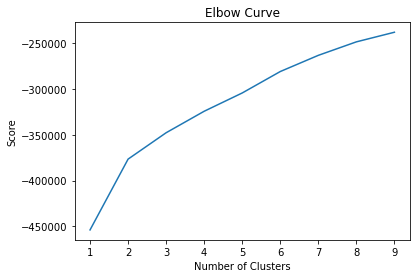

In [16]:
# Plot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It can be observed that the "elbow" occurs at 2 clusters.
<br>Therefore, 2 clusters will be used in the nest steps of the analysis.

# 05. k-means algorithm

In [17]:
# Create the k-means object
kmeans = KMeans(n_clusters = 2)

In [18]:
# Fit the k-means object to the data
kmeans.fit(df_standardized)

KMeans(n_clusters=2)

# 06. Attach a new column with the resulting clusters

In [19]:
# Store the predictions in a new column 'clusters'
df['clusters'] = kmeans.fit_predict(df_standardized)

In [20]:
# Display the top 5 rows
pd.set_option('display.max_columns', None)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,0


In [21]:
# Check the count for each cluster
df['clusters'].value_counts()

0    13878
1     7735
Name: clusters, dtype: int64

# 07. Visualizations of clustered data

The first visualizations will focus on the relationships between 'price' and the top 5 variables with the largest correlation coefficients (above 0.5):
- 'price' vs 'sqft_living'
- 'price' vs 'grade'
- 'price' vs 'sqft_above'
- 'price' vs 'sqft_living15'
- 'price' vs 'bathrooms'

Then, additional visualizations will be generated to investigate relationships between different variables, as follows:
- 'sqft_living' vs 'grade'
- 'sqft_above' vs 'grade'
- 'sqft_living' vs 'sqft_living15'
- 'grade' vs 'bathrooms'
- 'price' vs 'yr_built'

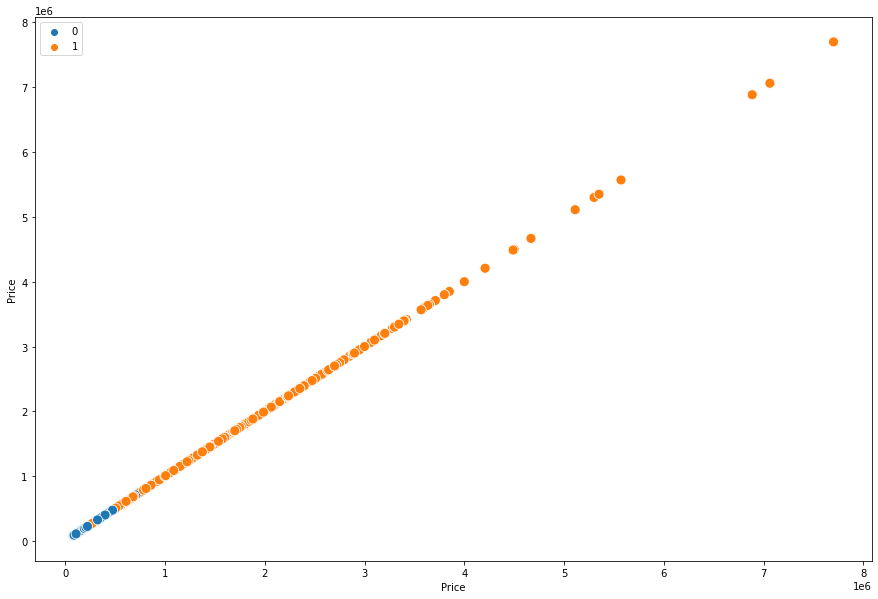

In [22]:
# Plot the clusters for the 'price'
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['price'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Price')
plt.show()

The scatterplot shows that **the first cluster** (labelled as 0, which is the most populated) **gathers properties with lower prices**, while **the second cluster** (labelled as 1) **includes properties with higher prices**.

Therefore, the following two profiles can be identified:
- **Cheap properties** (cluster 0)
- **Expensive properties** (cluster 1)

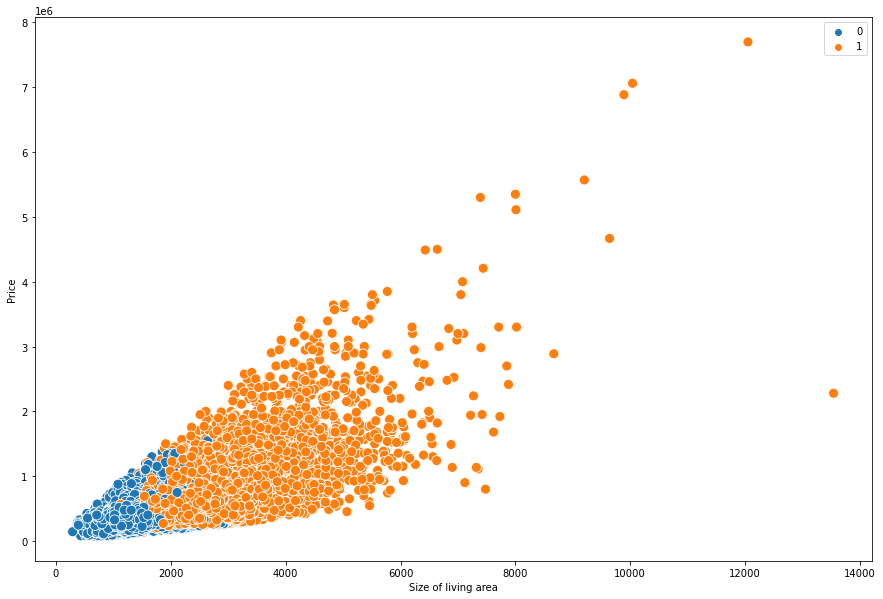

In [24]:
# Plot the clusters for the 'price' and 'sqft_living' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Size of living area')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller living areas
- Expensive properties (labelled as 1) have larger living areas

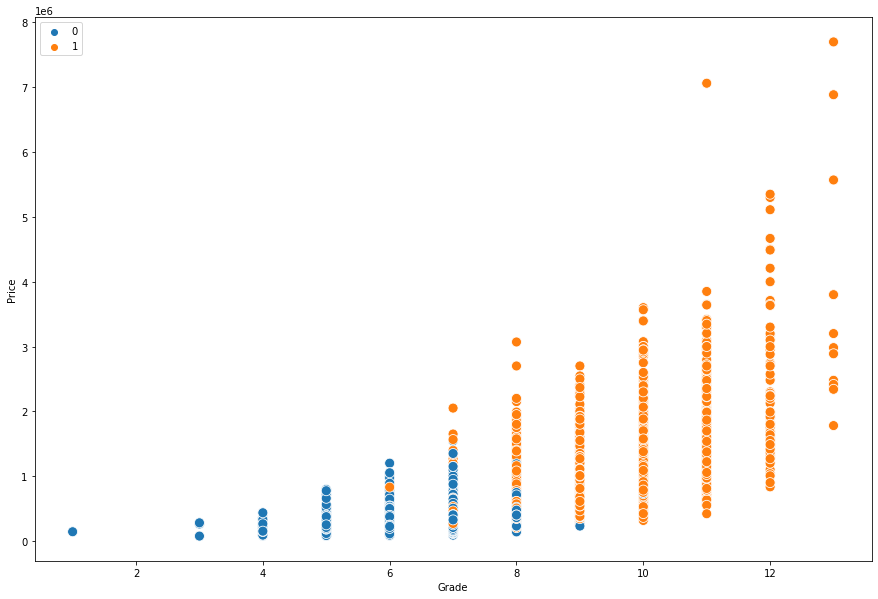

In [25]:
# Plot the clusters for the 'price' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['grade'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have lower grades
- Expensive properties (labelled as 1) have higher grades

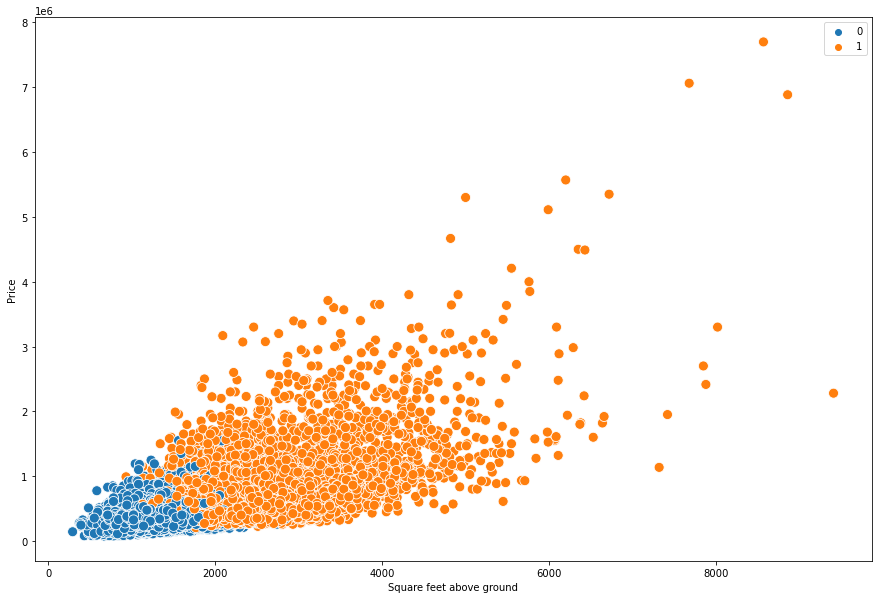

In [26]:
# Plot the clusters for the 'price' and 'sqft_above' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_above'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Square feet above ground')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller square footages above ground
- Expensive properties (labelled as 1) have larger square footages above ground

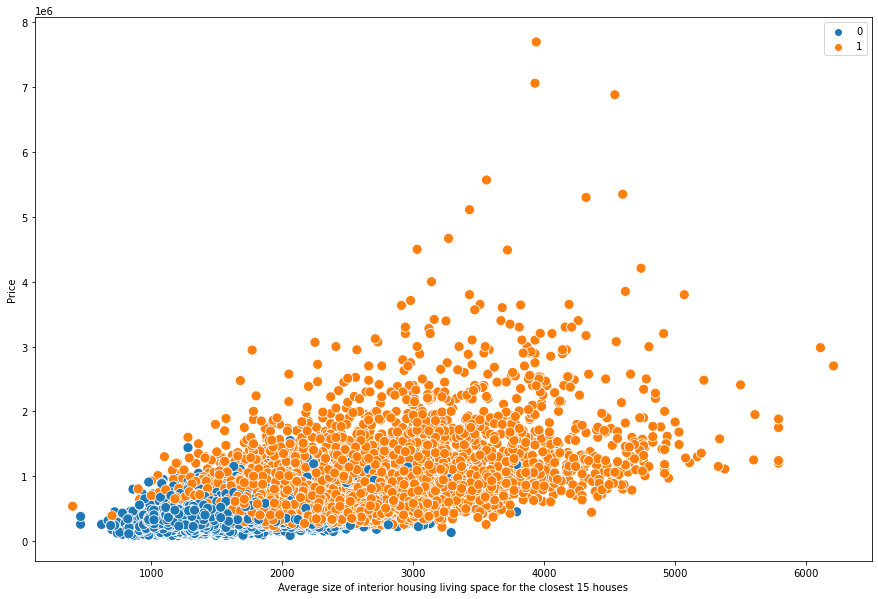

In [27]:
# Plot the clusters for the 'price' and 'sqft_living15' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_living15'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Average size of interior housing living space for the closest 15 houses')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) tend to be surrounded by properties with smaller living areas
- Expensive properties (labelled as 1) tend to be surrounded by properties with larger living areas

However, while the previous scatterplots displayed a clear distinction between the two clusters, in this case the data points appear more scattered and less structured, perhaps indicating that other factors may have a higher influence on prices.

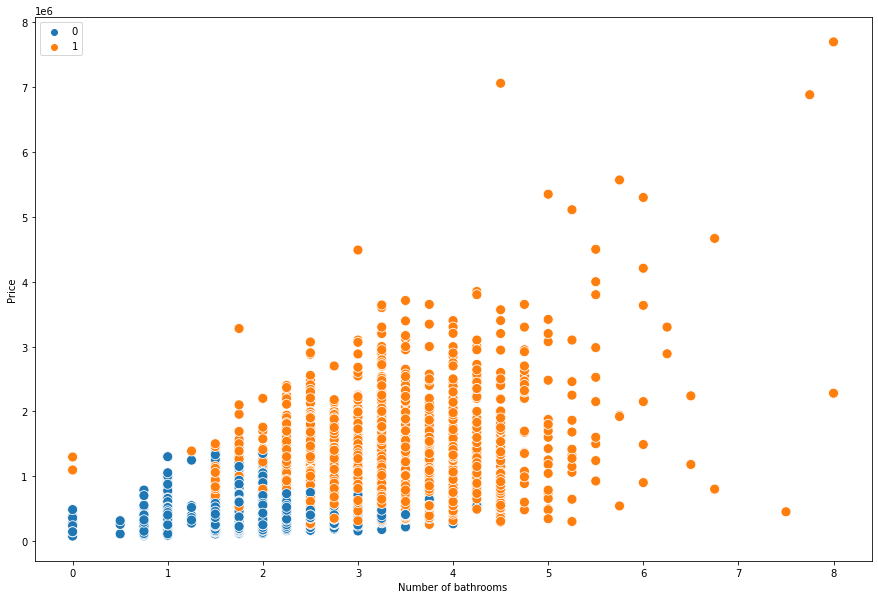

In [28]:
# Plot the clusters for the 'price' and 'bathrooms' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['bathrooms'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller numbers of bathrooms
- Expensive properties (labelled as 1) have larger numbers of bathrooms

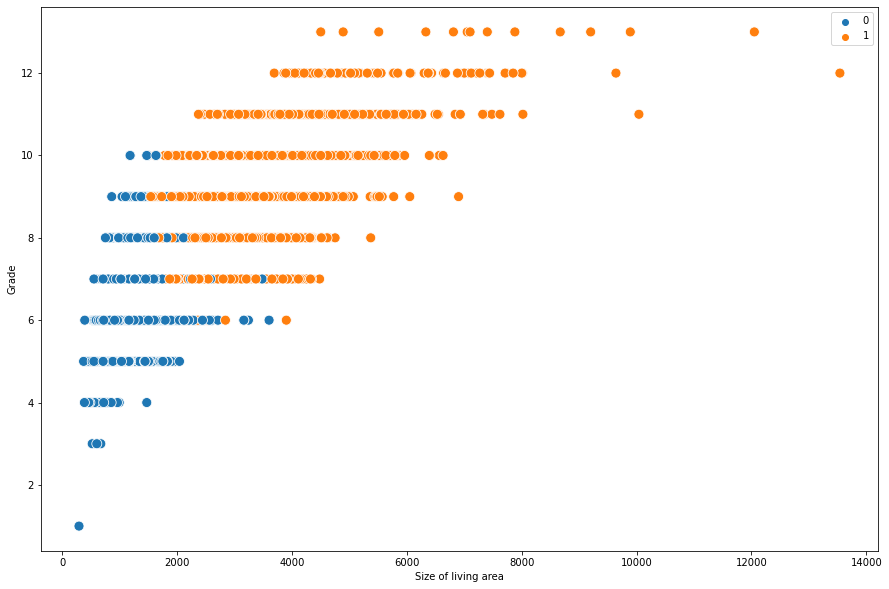

In [29]:
# Plot the clusters for the 'sqft_living' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_living'], y=df['grade'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Size of living area')
plt.ylabel('Grade')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller living areas and lower grades
- Expensive properties (labelled as 1) have larger living areas and higher grades

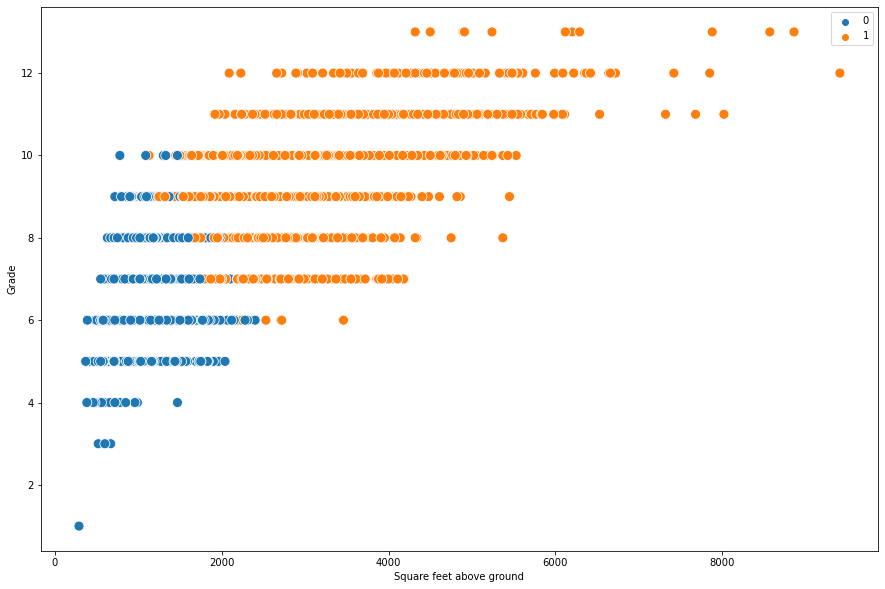

In [30]:
# Plot the clusters for the 'sqft_above' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_above'], y=df['grade'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Square feet above ground')
plt.ylabel('Grade')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller square footages above ground and lower grades
- Expensive properties (labelled as 1) have larger square footages above ground and higher grades

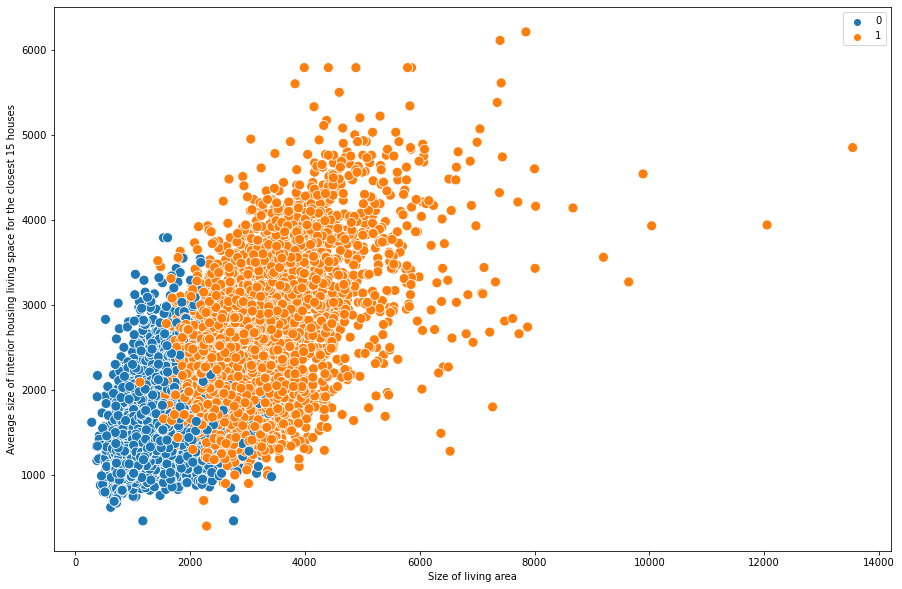

In [31]:
# Plot the clusters for the 'sqft_living' and 'sqft_living15' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['sqft_living'], y=df['sqft_living15'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Size of living area')
plt.ylabel('Average size of interior housing living space for the closest 15 houses')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller living areas and tend to be surrounded by properties with smaller living areas
- Expensive properties (labelled as 1) have larger living areas and tend to be surrounded by properties with larger living areas

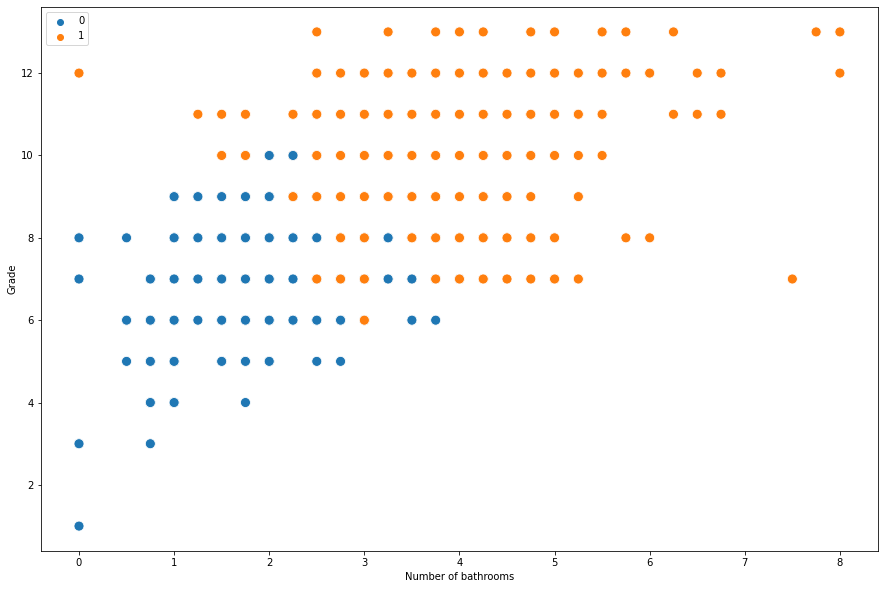

In [32]:
# Plot the clusters for the 'bathrooms' and 'grade' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['bathrooms'], y=df['grade'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of bathrooms')
plt.ylabel('Grade')
plt.show()

The following observations can be made:
- Cheap properties (labelled as 0) have smaller numbers of bathrooms and lower grades
- Expensive properties (labelled as 1) have larger numbers of bathrooms and higher grades

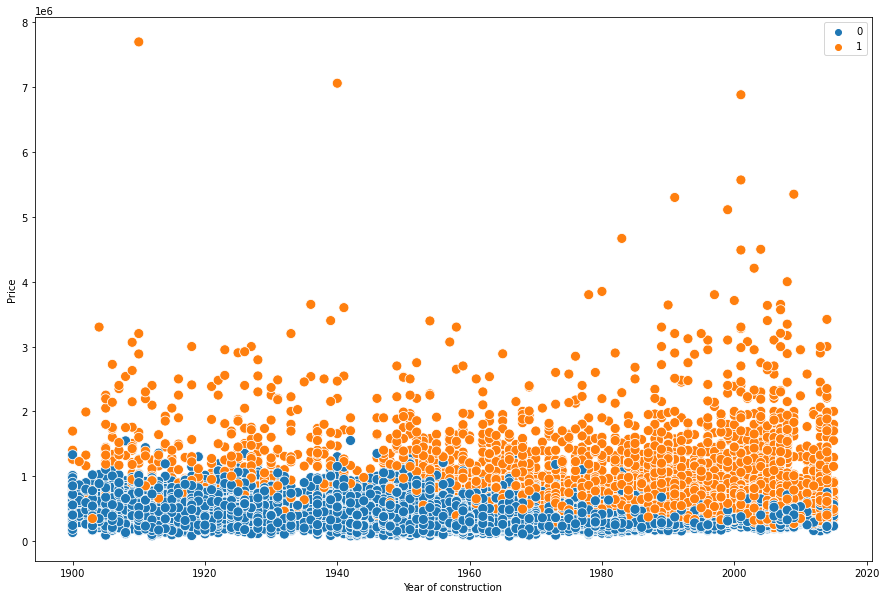

In [33]:
# Plot the clusters for the 'price' and 'yr_built' variables
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=df['yr_built'], y=df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Year of construction')
plt.ylabel('Price')
plt.show()

It can be observed that the data points are pretty evenly distributed along the x-axis, thus the year of construction doesn't seem to have a great influence on price.

# 08. Discuss how and why the clusters make sense

The above scatterplots clearly show that the data points can be divided into two clusters based on different features that influence home sales prices. 
<br>These features are:
- Price
- Grade
- Square footage above ground
- Average size of interior housing living space for the closest 15 houses
- Number of bathrooms

In particular, the two clusters indicate that the above features tend to be positively correlated, i.e. they all increase and decrease simultaneously. In fact, as previously discovered, a single feature on its own is not sufficient to explain home sales prices, and more aspects need to be factored in to predict the value of a property.

# 09. Descriptive statistics

In [34]:
# Group by 'clusters' and calculate descriptive statistics
df.groupby('clusters').agg(['mean', 'median', 'max'])

price                       bedrooms            bathrooms  \
                  mean    median        max      mean median max      mean   
clusters                                                                     
0         410179.00281  380000.0  1550000.0  3.080127    3.0   8  1.755404   
1         773168.81797  653000.0  7700000.0  3.892437    4.0  33  2.759502   

                       sqft_living                     sqft_lot          \
         median   max         mean  median    max          mean  median   
clusters                                                                  
0          1.75  4.25  1599.696282  1560.0   3920   9969.868425  7245.0   
1          2.50  8.00  2941.472269  2780.0  13540  24323.859858  8804.0   

                     floors             waterfront                 view  \
              max      mean median  max       mean median max      mean   
clusters                                                                  
0         1164794  1.294819    1.0  3.5   0.002738    0.0   1  0.122136   
1         1651359  1.852230    2.0  3.5   0.016160    0.0   1  0.435553   

                    condition                grade              sqft_above  \
         median max      mean median max      mean median max         mean   
clusters                                                                     
0           0.0   4  3.503531    3.0   5  7.068093    7.0  10  1325.410722   
1           0.0   4  3.240595    3.0   5  8.713251    9.0  13  2619.061151   

                       sqft_basement                  yr_built                \
          median   max          mean median   max         mean  median   max   
clusters                                                                       
0         1290.0  3080    274.285560    0.0  1990  1960.780300  1961.0  2015   
1         2500.0  9410    322.411118    0.0  4820  1989.350356  1995.0  2015   

         yr_renovated                    zipcode                        lat  \
                 mean median   max          mean   median    max       mean   
clusters                                                                      
0           80.453668    0.0  2015  98089.445741  98105.0  98199  47.560970   
1           91.486749    0.0  2015  98057.296057  98052.0  98199  47.558406   

                                  long                   sqft_living15  \
           median      max        mean   median      max          mean   
clusters                                                                 
0         47.5713  47.7776 -122.253306 -122.292 -121.315   1640.769275   
1         47.5726  47.7767 -122.143188 -122.149 -121.402   2606.950614   

                          sqft_lot15                         year          \
          median   max          mean  median     max         mean  median   
clusters                                                                    
0         1600.0  3790   9063.073570  7350.0  392040  2014.330235  2014.0   
1         2530.0  6210  19416.586555  8560.0  871200  2014.309890  2014.0   

                   month             
           max      mean median max  
clusters                             
0         2015  6.568382    6.0  12  
1         2015  6.585262    6.0  12

The following observations can be made:
- Expensive properties (labelled as 1) have the best stats in all categories except 'condition'.
- The condition of the property doesn't seem to have a large impact on sales prices.
- The age of the property doesn't seem to have a large impact on sales prices.

In light of all the findings, the above-mentioned profiles can now be more properly defined as:
- **Low-class properties**: falling within cluster 0
- **High-class properties**: falling within cluster 1

# 10. Next steps

The analysis has shown that many different factors contribute to the value of a property: most noticeably, the size of the living area and the grade are among the most important.
However, using all the available variables did not allow to achieve a high level of accuracy in describing home sales prices, thus some changes would need to be made.

<br>First, the following variables could be discarded, as they don't seem to have an impact on price:
- yr_renovated
- sqft_lot
- sqft_lot15
- yr_built
- condition

<br> Then, all the geographic variables (zip code, latitude and longitude) should be transformed to better represent location-related trends rather than coordinates. In fact, properties in a specific area could be more expensive due to a number of factors, such as the distance from city centre or the available amenities, that are not related to the geographic coordinates.
<br>For example, latitude and longitude could be translated into a new variable that represents the distance from the largest nearby city.

<br>Finally, the data could be fed into a machine learning algorithm to predict home sales prices.

# 11. Export dataframe

In [ ]:
df.to_csv(os.path.join(path,'02 Data','Prepared Data','kc_house_data_clustered.csv'))